<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [44]:
import pandas as pd

In [45]:
data = pd.read_csv("flamengo.csv")

In [46]:
len(data)

6004

In [47]:
data["article_time"] = data["date"].apply(lambda x: x.strip().split(" ")[1] if not pd.isnull(x) else x)
data["article_date"] = data["date"].apply(lambda x: x.strip().split(" ")[0] if not pd.isnull(x) else x)
data["month-year"] = data["article_date"].apply(lambda x: x.split("/")[-1] + "-" + x.split("/")[1])

In [48]:
def count_words(data):
    return len(data.split(" "))

def count_term(data, term):
    return sum([1 for word in data.split(" ") if word.lower() == term])

def create_n_column(data, term):
    data["n_" + term] = data["text"].apply(lambda x: count_term(x, term))
    return data

def plot_frequency_terms(data, terms, aggregation_col="month-year"):
    for term in terms:
        df = create_n_column(data, term)
    df.groupby(aggregation_col).sum()[["n_" + term for term in terms]].divide(df.groupby(aggregation_col)["n_words"].sum(), axis=0).sort_index().plot(figsize=(14, 6))
    
    plt.title("Frequency of \"{}\" in comments".format(term))
    
def plot_frequency_term(data, term, aggregation_col="month-year"):
    df = create_n_column(data, term)
    (df.groupby(aggregation_col).sum()["n_" + term] / df.groupby(aggregation_col)["n_words"].sum()).plot(figsize=(14, 6))
    
    plt.title("Frequency of \"{}\" in comments".format(term))
      

In [49]:
data["n_words"] = data["text"].apply(count_words)

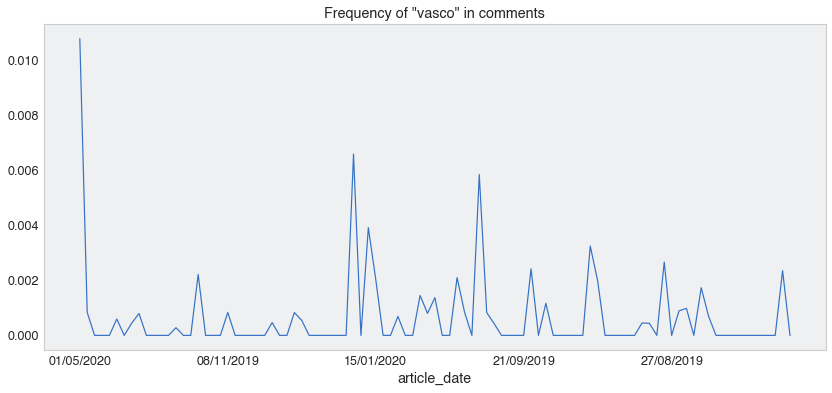

In [50]:
plot_frequency_term(data, "vasco", aggregation_col="article_date")

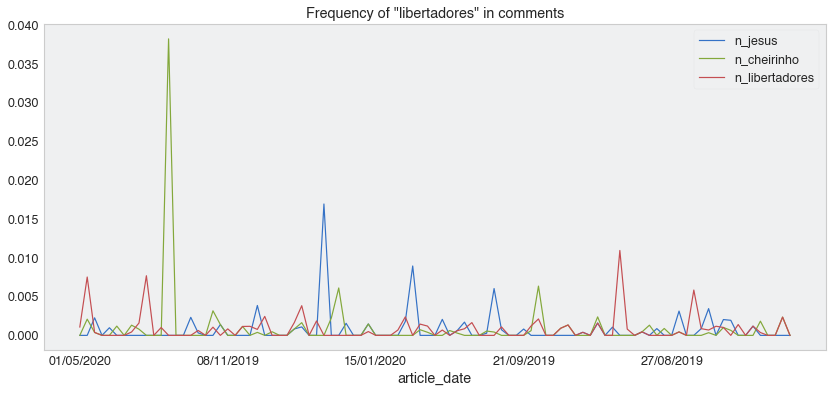

In [51]:
terms = ["jesus", "cheirinho", "libertadores"]
plot_frequency_terms(data, terms, "article_date")

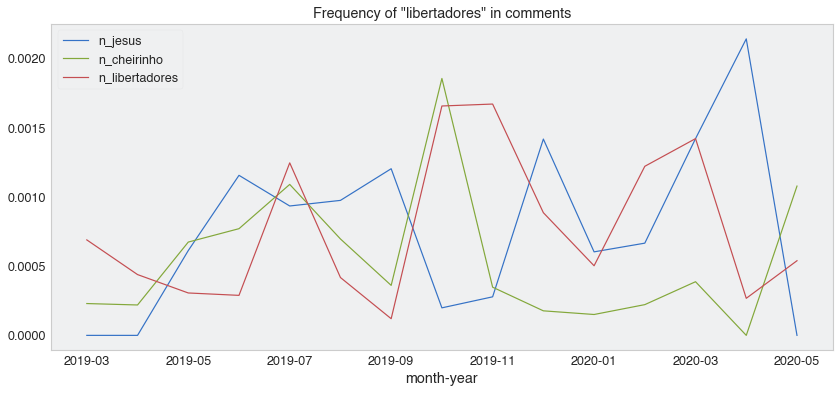

In [52]:
plot_frequency_terms(data, terms, "month-year")

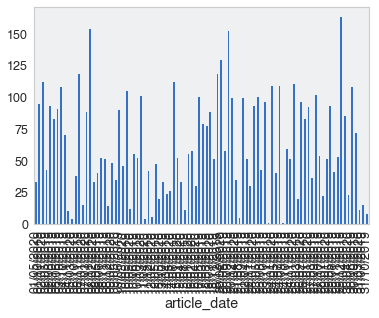

In [43]:
data.groupby("article_date")["text"].count().plot(kind="bar")